In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataset

In [40]:
# Importing the datasets

dataset = pd.read_csv('50_Startups.csv')

In [41]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
dataset['State'] = pd.get_dummies(dataset['State'],drop_first=True)

In [56]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,0,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,0,166187.94


### Independent and dependent variables

In [44]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [26]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
X

array([['0.0', '0.0', '1.0', '165349.2', '136897.8', '471784.1'],
       ['1.0', '0.0', '0.0', '162597.7', '151377.59', '443898.53'],
       ['0.0', '1.0', '0.0', '153441.51', '101145.55', '407934.54'],
       ['0.0', '0.0', '1.0', '144372.41', '118671.85', '383199.62'],
       ['0.0', '1.0', '0.0', '142107.34', '91391.77', '366168.42'],
       ['0.0', '0.0', '1.0', '131876.9', '99814.71', '362861.36'],
       ['1.0', '0.0', '0.0', '134615.46', '147198.87', '127716.82'],
       ['0.0', '1.0', '0.0', '130298.13', '145530.06', '323876.68'],
       ['0.0', '0.0', '1.0', '120542.52', '148718.95', '311613.29'],
       ['1.0', '0.0', '0.0', '123334.88', '108679.17', '304981.62'],
       ['0.0', '1.0', '0.0', '101913.08', '110594.11', '229160.95'],
       ['1.0', '0.0', '0.0', '100671.96', '91790.61', '249744.55'],
       ['0.0', '1.0', '0.0', '93863.75', '127320.38', '249839.44'],
       ['1.0', '0.0', '0.0', '91992.39', '135495.07', '252664.93'],
       ['0.0', '1.0', '0.0', '119943.24', '1

### Train test split

In [45]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Fit the linear model

In [46]:
# Fitting the Multiple Linear Regression in the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [53]:
# Compute model slope and intercept

a = regressor.coef_
b = regressor.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [ 8.01964279e-01  5.56054612e-02  3.00982810e-02 -1.40961768e+03]
Estimated model intercept, b: (40214.43398341113,)


In [48]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.round(2)})
df

,Real Values,Predicted Values
0,103282.38,106897.54
1,144259.40,132161.07
2,146121.95,134992.07
3,77798.83,72244.23
4,191050.39,181171.42
5,105008.31,115782.35
6,81229.06,65681.07
7,97483.56,100389.90
8,110352.25,115512.21
9,166187.94,170282.37


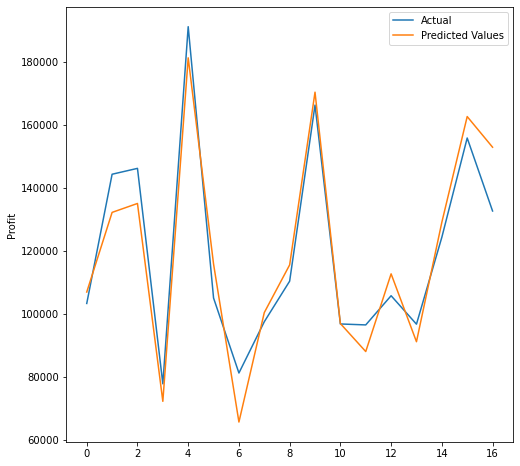

In [52]:
plt.figure(figsize=(8,8))

plt.plot(df['Real Values'], label='Actual')
plt.plot(df['Predicted Values'],label='Predicted Values')
plt.ylabel('Profit')
plt.legend()

### Metrics for model performance

In [58]:
from sklearn.metrics import r2_score
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test - y_pred)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test - y_pred) **2 ))
print('R2-score: %.2f' % r2_score(y_test, y_pred))

Mean absolute error: 7859.96
Residual sum of squares (MSE): 85286500.85
R2-score: 0.91


### Checking for Overfitting and Underfitting

In [57]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(regressor.score(X_train,y_train)))

print("Test set score: {:.4f}".format(regressor.score(X_test,y_test)))

Training set score: 0.9557
Test set score: 0.9101


### Exercise
    1. What is difference between simple linear and multiple linear regressions?
    2. True-False: Linear Regression is mainly used for Regression. -TRUE
    3. Print RMSE value